In [1]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [2]:
#Distance and error data
distances = [38.91, 37.14, 38.19, 41.03, 34.86, 37.33, 35.16, 37.96, 36.93, 40.41, 29.50, 37.33, 41.84, 37.53, 34.12,
             34.11, 37.94, 34.43, 36.68, 41.31, 39.61, 35.48, 34.98, 39.05, 39.62, 37.96, 39.02, 37.47, 33.76, 36.51]
stddevs = [1.41, 0.36, 0.69, 3.53, 2.64, 0.17, 2.34, 0.46, 0.57, 2.91, 8.00, 0.17, 4.34, 0.03, 3.38, 3.39, 0.44, 3.07, 
          0.82, 3.81, 2.11, 2.02, 2.52, 1.55, 2.12, 0.46, 1.52, 0.03, 3.74, 0.99]

In [3]:
#Defining required functions
def mean(data):
    n = len(data)
    mu = (sum(data)/n)
    return mu

def stddev(data):
    n = len(data)
    mu = mean(data)
    numerator = []
    for x in data:
        numerator.append((x - mu)**2)
    sigma = (sum(numerator)/n)**(1/2)
    return sigma

def wgtmean(data, errors):
    w = []
    for i in range(len(data)):
        w.append(1/(errors[i])**2)
    num = []
    for i in range(len(data)):
        num.append(data[i]*w[i])
    wgtmean = sum(num)/sum(w)
    return wgtmean

def wgtstddev(data, errors):
    w = []
    for i in range(len(data)):
        w.append(1/(errors[i])**2)
    wgtstddev = (1/sum(w))**0.5
    return wgtstddev

def poisson(min, max, mu):
    prob = [(((mu**x)/m.factorial(x))*(2.71828**(-mu))) for x in range(min, max)]
    return prob

def gaussian(data, mu, sigma):
    prob = [(1/sigma*(2*m.pi)**0.5)**((-0.5)*((x - mu)/sigma)**2) for x in data]
    return prob

In [4]:
#Mean and standard deviation for the data
mean_distances = mean(distances)
stddev_distances = stddev(distances)
print (mean_distances, ' +- ', stddev_distances)

#Weighted mean and standard deviation for the data
mean_wgtdistances = wgtmean(distances, stddevs)
stddev_wgtdistances = wgtstddev(distances, stddevs)
print (mean_wgtdistances, ' +- ', stddev_wgtdistances)

37.20566666666666  +-  2.6063623223864254
37.49596246333524  +-  0.020740545122961505


Text(0,0.5,'Distance(pc)')

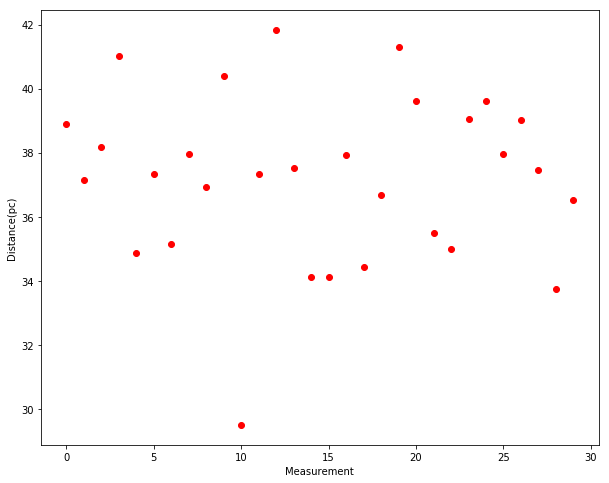

In [5]:
#Recreating figure 3
plt.figure(figsize = (10,8))
plt.plot(distances, 'ro')
plt.xlabel('Measurement')
plt.ylabel('Distance(pc)')

Text(0,0.5,'Number of Measurements')

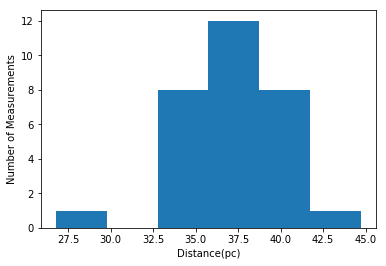

In [6]:
#Recreating figure 4
plt.hist(distances, bins = 6, range = (26.8, 44.7))
plt.xlabel('Distance(pc)')
plt.ylabel('Number of Measurements')

In [7]:
#Photon count rate data
pcr = [13, 17, 18, 14, 11, 8, 21, 18, 9, 12, 9, 17, 14, 6, 10, 16, 16, 11, 10, 12, 8, 20, 14, 10, 14, 17, 13, 16, 12, 10]

In [8]:
#Mean and standard deviation of pcr data
mean_pcr = mean(pcr)
stddev_pcr = stddev(pcr)
print (mean_pcr, ' +- ', stddev_pcr)

13.2  +-  3.7363083384538816


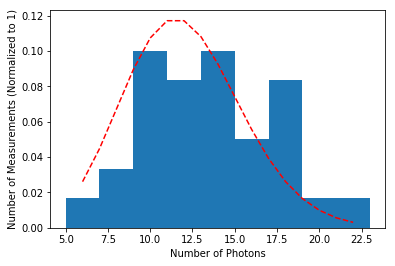

In [9]:
#Recreating plot 5 (only difference is that it is normalized)
xlin = np.arange(6, 23)
output = poisson(6, 23, 12)
plt.hist(pcr, bins = 9, range = (5, 23), normed=1)
plt.xlabel('Number of Photons')
plt.ylabel('Number of Measurements (Normalized to 1)')
plt.plot(xlin, output/np.sum(output)/(xlin[1] - xlin[0]), 'r--')